+ Requirements:
    1. The video 'videos/TableHorizRotationUniform_631g7.avi' is used.
    2. The images 'imgs/segmented_ori.png' y 'imgs/labeled_res.png' are required.
    3. The 'tools_creaVideo.py' file is required.
    4. The estimated time to complete this activity is approximately 1 hour.
<br><br>
+ Objectives of this notebook:
    1. Introduction to OpenCV
    2. To know how to implement image processing algorithms by accessing pixels directly (or with openCV functionality).
<br><br>
+ Summary of activities:
    1. Snippets of image preprocessing code will be analyzed.

%%latex
\tableofcontents
\newpage

# Introducction
The main objective of image processing is to obtain a final segmented (binary) image in pixels of interest and background pixels. Once we have the segmented image, binary image processes can be applied to try to improve the quality of the segmentation. Among these algorithms the morphological operations and the connected-components labeling algorithm stand out.

In the previous notebook '40_Image preprocessing.ipynb' we discussed the 'thresholding' point processing technique which is a segmentation technique with a fixed threshold. This technique can be applied when working under ideal conditions with a controlled illumination environment. In the ideal case of having a bimodal histogram between the pixel classes of interest and the background, the segmentation threshold is selected in the center of the histogram valley. In case of variations in illumination conditions, automatic and adaptive segmentation threshold detection techniques should be employed.

Below are a series of code cells showing some examples of simple image segmentation by applying OpenCV functionalities or by directly accessing image pixels.

# Demo 1: Object detection

- As always, we start by importing all the required modules:

In [19]:
import numpy as np  # the numpy module is associated with the alias np
import cv2          # OpenCV module
import matplotlib
import matplotlib.pyplot as plt    # the matplotlib.pyplot with the alias plt
from IPython.display import Image, display, clear_output  # Shows an image in the notebook
import time                        # module to mesuare time cost
import tools_creaVideo as crea     # Virtual camera
from skimage.data import page
from skimage.filters import (threshold_otsu, threshold_niblack, threshold_sauvola)

In [5]:
# **** It is important to consult the help of the version you are using ****
!python --version
print('Numpy:',np.__version__)
print('OpenCv:',cv2.__version__)

Python 3.8.13
Numpy: 1.19.2
OpenCv: 4.5.0


<a id='Captura3'></a>

## Imagen acquisition from video

Selected device: videos/TableHorizRotationUniforme_631g7.avi
Image shape:  (288, 380, 3)
Image type: <class 'numpy.ndarray'> of uint8


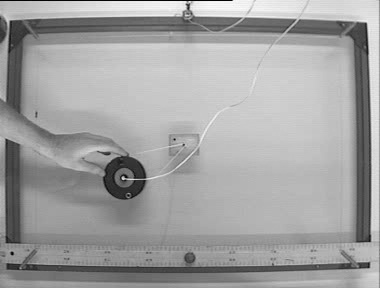

In [6]:
camara_dev = 'videos/TableHorizRotationUniforme_631g7.avi'
print('Selected device:', camara_dev)

# Open device
video = cv2.VideoCapture(camara_dev)

# Image acquisition: a BGR image is captured
ret_ok, img = video.read()

# Close device
video.release()

if ret_ok:
    print('Image shape: ', img.shape)
    print('Image type:',type(img),'of', img.dtype)
else:
    print('Error: the selected device is not available.')
    
# Conversion to grayscale image from BGR color space
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Shows the processed image
Image(cv2.imencode('.jpg', img_gray)[1])

## Image segmentation
You can find more information about segmentation techniques in this [OpenCV link](https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_thresholding/py_thresholding.html).

- The gray image histogram is displayed:

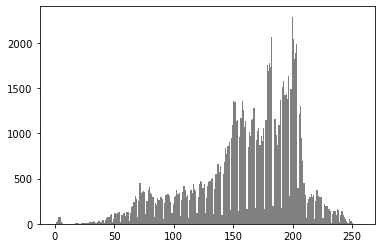

In [7]:
# Shows histogram
plt.hist(img_gray.ravel(),256,[0,256], color = "gray")
plt.show()

- We crop the image around the object of interest:

Cropped region of interest: 144 216 95 158


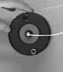

In [8]:
height, width = img_gray.shape
x_ini = int(height/2)
x_width = int(height/4)
x_end = x_ini + x_width
y_ini = int(width/4)
y_width = int(width/6)
y_end = y_ini + y_width
print('Cropped region of interest:', x_ini, x_end, y_ini, y_end)
img_resized = img_gray[x_ini:x_end, y_ini:y_end]

# Shows cropped image
Image(cv2.imencode('.jpg', img_resized)[1])

- An example of an automatic segmentation threshold detection algorithm (Otsu) is shown.

--- 0.000997304916381836 seconds ---
Applied threshold: 98.0


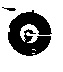

In [9]:
# Otsu method 
start_time = time.time()
threshold, img_resized_segmentada = cv2.threshold(img_resized,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print("--- %s seconds ---" % (time.time() - start_time))
print("Applied threshold:", threshold)

# Shows segmented image
Image(cv2.imencode('.jpg', img_resized_segmentada)[1])

- The threshold on the gray image histogram is displayed:

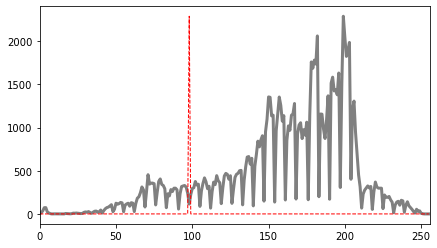

In [10]:
# Shows threshold on the histogram
fig = plt.subplots(figsize=(7, 4))
hist = cv2.calcHist([img_gray],[0],None,[256],[0,256])
plt.plot(hist, linewidth=3, color = 'gray')
plt.xlim([0,256])
threshold_mark = np.zeros(256)
threshold_mark[int(threshold)] = np.max(hist)
plt.plot(threshold_mark, linewidth=1, linestyle='dashed', color = 'red')
plt.show()

--- 0.0 seconds ---


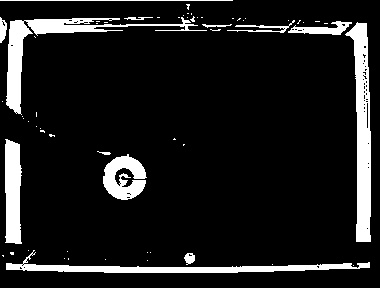

In [11]:
# Fixed threshold method
start_time = time.time()
ret, img_segmented = cv2.threshold(img_gray, threshold, 255, cv2.THRESH_BINARY_INV)
print("--- %s seconds ---" % (time.time() - start_time))

# Shows segmented image
Image(cv2.imencode('.jpg', img_segmented)[1])

## Morphological transformations
Morphological transformations can be applied on binary images. If we have a binary (segmented) image we can apply opening (erosions followed by dilations) or closing (dilations followed by erosions) operations to try to remove small objects of interest or close internal holes respectively. You can find more information about morphological operations in this [OpenCV link](https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html).

- A morphological open transformation is applied (small white objects are eliminated).

--- 0.0009975433349609375 seconds ---


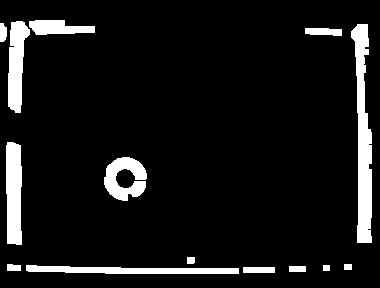

In [12]:
# Application of the open transformation with a (6.6) pixel kernel 
start_time = time.time()
kernel = np.ones((6,6),np.uint8)
img_opened = cv2.morphologyEx(img_segmented, cv2.MORPH_OPEN, kernel)
print("--- %s seconds ---" % (time.time() - start_time))

# Mostrar la imagen procesada
Image(cv2.imencode('.jpg', img_opened)[1])

- A morphological close transformation is applied (small dark objects are removed).

--- 0.0 seconds ---


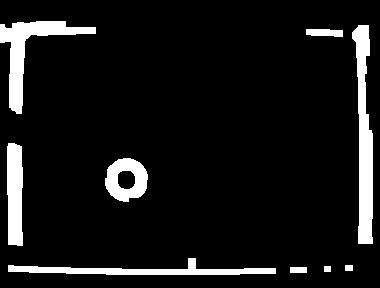

In [13]:
# Application of the close transformation with a (6.6) pixel kernel 
start_time = time.time()
kernel = np.ones((6,6),np.uint8)
img_opened_closed = cv2.morphologyEx(img_opened, cv2.MORPH_CLOSE, kernel)
print("--- %s seconds ---" % (time.time() - start_time))

# Mostrar la imagen procesada
Image(cv2.imencode('.jpg', img_opened_closed)[1])

## Connected component labeling algorithm
A blob is the set of pixels of interest that are connected. The following images show pixels belonging to the same blob with the same color.

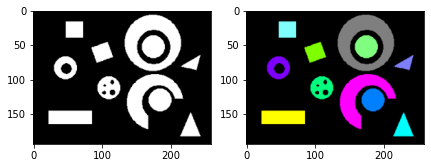

In [14]:
# Reads images
segmented_ori = cv2.imread('imgs/segmented_ori.png')
labeled_res = cv2.imread('imgs/labeled_res.png')

# Shows images
fig, axes = plt.subplots(1,2,figsize=(7, 4)) # crea una figura de 7x4 pulgadas
axes[0].imshow(cv2.cvtColor(segmented_ori, cv2.COLOR_BGR2RGB))
axes[1].imshow(cv2.cvtColor(labeled_res, cv2.COLOR_BGR2RGB))
plt.show()

- The objects of interest are detected:

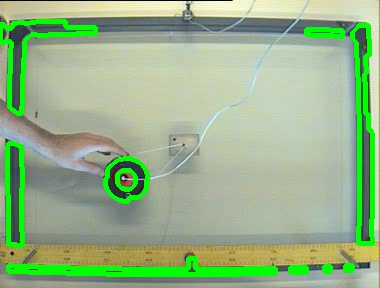

In [15]:
# In OpenCv, the labeling algorithm is called findContours
contours, hierarchy = cv2.findContours(img_opened_closed, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# All the contours of the objects of interest are drawn in green with a thickness of 3
img_contours = img.copy()
cv2.drawContours(img_contours, contours, -1, (0,255,0), 3)

# Shows image with contours
Image(cv2.imencode('.jpg', img_contours)[1])

In [16]:
for cnt in contours:
    
    display_handle=display(None, display_id=True)
    # Copy the original image
    img_contours = img.copy()

    # Draws each contour
    cv2.drawContours(img_contours, [cnt], 0, (0,255,0), 3)

    # Shows each contour
    display_handle.update(Image(cv2.imencode('.jpg', img_contours)[1]))
    
    input('Press enter to continue...')
    clear_output()

    display_handle.update(None)

# Demo 2: Threshold analysis
Thresholding analysis for color changes of the object of interest:

In [21]:
#---------------------------------------------------------------------------
# If no camera is available, next virtual devices may be used. 
#---------------------------------------------------------------------------
#camara_dev = 'colores'
#camara_dev = 'circulo' # 
#camara_dev = 'figuras'
#camara_dev = 'digitos'

# Select a video device for a virtual camera
camara_dev = 'circulo'
print('Selected device:', camara_dev)

Selected device: circulo


In [23]:
video = crea.VideoVirtual(camara_dev)

try:
    while True:
        # Reads an image from virtual camera
        ret_ok, img = video.read()

        if ret_ok:
            display_handle=display(None, display_id=True)
            
            threshold, img_segmented = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
            print('Threshold:', threshold)
            
            imgs = np.concatenate((img, img_segmented), axis=1)
            display_handle.update(Image(data=cv2.imencode('.jpg', imgs)[1]))
                       
            # Shows histogram
            fig = plt.subplots(figsize=(4, 3))
            hist = cv2.calcHist([img],[0],None,[256],[0,256])
            plt.plot(hist, linewidth=3, color = 'gray')
            plt.xlim([0,256])
            threshold_mark = np.zeros(256)
            threshold_mark[int(threshold)] = np.max(hist)
            plt.plot(threshold_mark, linewidth=1, linestyle='dashed', color = 'red')
            plt.show()
            
            input("Press enter to capture the next image.")
            display_handle.update(None)
            clear_output()
        else:
            print('End of video.')
            break

except KeyboardInterrupt:
    pass
finally:
    video.release()

End of video.
Número de imágenes generadas 14


- Other segmentation methods available in the skimage library are shown:

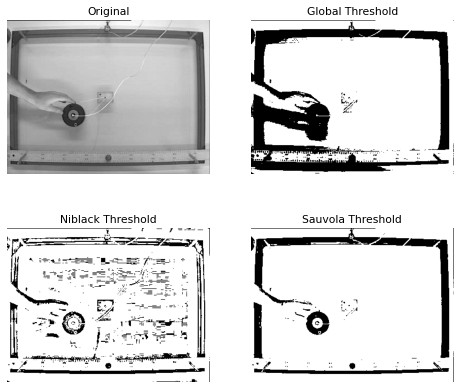

In [20]:
matplotlib.rcParams['font.size'] = 9

image = img_gray.copy()
binary_global = image > threshold_otsu(image)

window_size = 25
thresh_niblack = threshold_niblack(image, window_size=window_size, k=0.8)
thresh_sauvola = threshold_sauvola(image, window_size=window_size)

binary_niblack = image > thresh_niblack
binary_sauvola = image > thresh_sauvola

plt.figure(figsize=(8, 7))
plt.subplot(2, 2, 1)
plt.imshow(image, cmap=plt.cm.gray)
plt.title('Original')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Global Threshold')
plt.imshow(binary_global, cmap=plt.cm.gray)
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(binary_niblack, cmap=plt.cm.gray)
plt.title('Niblack Threshold')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(binary_sauvola, cmap=plt.cm.gray)
plt.title('Sauvola Threshold')
plt.axis('off')

plt.show()

# References
+ [Python documentation](https://docs.python.org/3/)
+ [Numpy documentation](https://numpy.org/doc/)
+ [Documentación de OpenCV 4.5](https://docs.opencv.org/4.5.0/)
+ [Machine Learning for OpenCV 4 - Second Edition
by Vishwesh Ravi Shrimali; Michael Beyeler; Aditya Sharma
Published by Packt Publishing, 2019](https://learning.oreilly.com/library/view/machine-learning-for/9781789536300/cover.xhtml)
+ [Machine Learning for OpenCV 4 : Intelligent Algorithms for Building Image Processing Apps Using OpenCV 4, Python, and Scikit-Learn. by Sharma, Aditya, et al. Second edition., 201](https://polibuscador.upv.es/permalink/f/6ptg6i/alma5191663190003706)
+ [Image processing](https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_table_of_contents_imgproc/py_table_of_contents_imgproc.html)